In [1]:
import numpy as np
import random
import os

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib.font_manager as fm

# 한글 폰트 설정하기
# 폰트 경로 지정
font_path = r'C:\Users\wjdgk\AppData\Local\Microsoft\Windows\Fonts\NanumSquareRoundB.ttf'

# 불필요한 경고 메시지 무시
import warnings
warnings.filterwarnings("ignore")

fe = fm.FontEntry(fname=font_path, name='NanumSquareRoundB')
fm.fontManager.ttflist.insert(0, fe)
plt.rc('font', family='NanumSquareRoundB')

In [3]:
import pandas as pd
import numpy as np

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [4]:
# 데이터 불러오기
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
submission_df = pd.read_csv('sample_submission.csv')

In [5]:
# 데이터 확인
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB
None


In [6]:
display(train_df.describe())
display(test_df.describe())

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
count,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294.000000,9.629400e+04,9.629400e+04,96294.000000,96294.000000
mean,1.830400e+07,9.392672e+07,19.379590,25.304827,0.345681,8.225035e+05,4.282282e+05,54.380584,0.005805
std,1.032908e+07,9.956871e+07,33.569559,12.088566,0.919119,1.027745e+06,4.402111e+05,1414.769218,0.079966
min,1.200000e+06,0.000000e+00,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.020000e+07,5.760000e+07,12.650000,17.000000,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000
50%,1.680000e+07,7.800000e+07,18.740000,24.000000,0.000000,5.976960e+05,2.870040e+05,0.000000,0.000000
75%,2.400000e+07,1.128000e+08,25.540000,32.000000,0.000000,1.055076e+06,5.702160e+05,0.000000,0.000000
max,4.200000e+07,1.080000e+10,9999.000000,169.000000,30.000000,4.195594e+07,5.653416e+06,75768.000000,4.000000


,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
count,6.419700e+04,6.419700e+04,64197.000000,64197.000000,64197.000000,6.419700e+04,6.419700e+04,64197.000000,64197.000000
mean,1.829630e+07,9.446378e+07,19.433747,25.295310,0.342882,8.231412e+05,4.324562e+05,50.313192,0.005499
std,1.038592e+07,1.117071e+08,40.375816,12.021127,0.901277,9.880161e+05,4.472797e+05,1396.384546,0.080020
min,1.200000e+06,0.000000e+00,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.008000e+07,5.759880e+07,12.630000,17.000000,0.000000,3.081840e+05,1.343520e+05,0.000000,0.000000
50%,1.680000e+07,7.800000e+07,18.770000,24.000000,0.000000,5.986800e+05,2.875680e+05,0.000000,0.000000
75%,2.400000e+07,1.128000e+08,25.560000,32.000000,0.000000,1.061508e+06,5.774160e+05,0.000000,0.000000
max,4.200000e+07,1.044790e+10,9999.000000,135.000000,15.000000,4.049760e+07,5.645688e+06,108240.000000,4.000000


In [7]:
for column in test_df.columns:
    unique_values = test_df[column].unique()
    print(f"Column: {column}")
    print(f"Unique values: {unique_values}")
    print(f"개수: {len(unique_values)}")
    print("="*50)

Column: ID
Unique values: ['TEST_00000' 'TEST_00001' 'TEST_00002' ... 'TEST_64194' 'TEST_64195'
 'TEST_64196']
개수: 64197
Column: 대출금액
Unique values: [16800000  8400000 17280000 ...  1410000  2130000 39810000]
개수: 1309
Column: 대출기간
Unique values: [' 36 months' ' 60 months']
개수: 2
Column: 근로기간
Unique values: ['8 years' '5 years' '6 years' 'Unknown' '10+ years' '3 years' '< 1 year'
 '1 year' '7 years' '4 years' '2 years' '9 years' '10+years' '<1 year' '3'
 '1 years']
개수: 16
Column: 주택소유상태
Unique values: ['MORTGAGE' 'RENT' 'OWN']
개수: 3
Column: 연간소득
Unique values: [ 132000000   89971200  150000000 ...   30018000 1356000000   44712000]
개수: 5842
Column: 부채_대비_소득_비율
Unique values: [19.64 15.84  8.41 ... 40.61  2.03 44.4 ]
개수: 3992
Column: 총계좌수
Unique values: [ 12  25  20  30  50  15  46   7  27  34  13  39   9  21  36  24  18  32
  16  19  23  26  31   5  10  45  63  22  59  17  29  60  11  53  48  40
  28  14  38  51  67  43  33  37  41  66  49   8  55  35  42  44  64  69
   6  52  62  56  47

In [8]:
loan_purposes = train_df['대출목적'].unique()  # 대출목적 종류 추출

for purpose in loan_purposes:
    purpose_count = train_df[train_df['대출목적'] == purpose].shape[0]
    print(f"{purpose} 대출목적의 행 개수:", purpose_count)

부채 통합 대출목적의 행 개수: 55150
주택 개선 대출목적의 행 개수: 6160
주요 구매 대출목적의 행 개수: 1803
휴가 대출목적의 행 개수: 466
의료 대출목적의 행 개수: 1039
자동차 대출목적의 행 개수: 797
신용 카드 대출목적의 행 개수: 24500
소규모 사업 대출목적의 행 개수: 787
기타 대출목적의 행 개수: 4725
이사 대출목적의 행 개수: 506
주택 대출목적의 행 개수: 301
재생 에너지 대출목적의 행 개수: 60


In [9]:
# 대출기간 36 60
train_df['대출기간'] = train_df['대출기간'].apply(lambda x: int(x.split()[0]))
test_df['대출기간'] = test_df['대출기간'].apply(lambda x: int(x.split()[0]))

In [10]:
# 근로기간 
# 근로기간 처리
train_df['근로기간'] = train_df['근로기간'].replace('10+ years', '11 years')
train_df['근로기간'] = train_df['근로기간'].replace('10+years', '11 years')
train_df['근로기간'] = train_df['근로기간'].replace('< 1 year', '0 years')
train_df['근로기간'] = train_df['근로기간'].replace('<1 year', '0 years')
train_df['근로기간'] = train_df['근로기간'].replace('Unknown', '11')
# train_df['근로기간'] = train_df['근로기간'].replace('Unknown', '0')
# train_df['근로기간'] = train_df['근로기간'].replace('Unknown', np.nan)
# # NaN 값을 포함한 행 삭제
# train_df.dropna(subset=['근로기간'], inplace=True)
train_df['근로기간'] = train_df['근로기간'].str.extract('(\d+)').astype(int)

test_df['근로기간'] = test_df['근로기간'].replace('10+ years', '11 years')
test_df['근로기간'] = test_df['근로기간'].replace('10+years', '11 years')
test_df['근로기간'] = test_df['근로기간'].replace('< 1 year', '0 years')
test_df['근로기간'] = test_df['근로기간'].replace('<1 year', '0 years')
test_df['근로기간'] = test_df['근로기간'].replace('Unknown', '11')
# test_df['근로기간'] = test_df['근로기간'].replace('Unknown', '0')
# test_df['근로기간'] = test_df['근로기간'].replace('Unknown', np.nan)
test_df['근로기간'] = test_df['근로기간'].str.extract('(\d+)').astype(int)

In [11]:
# 월별 상환액 계산
train_df['월별_상환액'] = train_df['대출금액'] / train_df['대출기간']
test_df['월별_상환액'] = test_df['대출금액'] / test_df['대출기간']

# 월별 소득 추정
train_df['월별_소득_추정'] = train_df['월별_상환액'] * train_df['부채_대비_소득_비율']
test_df['월별_소득_추정'] = test_df['월별_상환액'] * test_df['부채_대비_소득_비율']

# 연간소득 계산
train_df['추정_연간소득'] = train_df['월별_소득_추정'] * 12
test_df['추정_연간소득'] = test_df['월별_소득_추정'] * 12

# train_df에서 연간소득 값이 0인 행에 대해 연간소득 추정
zero_income_indices_train = train_df[train_df['연간소득'] == 0].index

for idx in zero_income_indices_train:
    # 연간소득 추정 계산
    estimated_annual_income = train_df.loc[idx, '월별_소득_추정'] * 12
    train_df.at[idx, '연간소득'] = estimated_annual_income

# test_df에서 연간소득 값이 0인 행에 대해 연간소득 추정
zero_income_indices_test = test_df[test_df['연간소득'] == 0].index

for idx in zero_income_indices_test:
    # 연간소득 추정 계산
    estimated_annual_income = test_df.loc[idx, '월별_소득_추정'] * 12
    test_df.at[idx, '연간소득'] = estimated_annual_income

In [12]:
# 대출목적

import category_encoders as ce

# 대출목적에 대해 BinaryEncoder 인스턴스 생성
encoder = ce.BinaryEncoder(cols=['대출목적'])

# train_df에 대해 Binary Encoding 수행
train_df_encoded = encoder.fit_transform(train_df['대출목적'])
# test_df에 대해 동일한 변환기로 Binary Encoding 수행
test_df_encoded = encoder.transform(test_df['대출목적'])

# train_df와 test_df의 원래 '대출목적' 열 삭제하고, 변환된 열 추가
train_df = pd.concat([train_df.drop(columns=['대출목적']), train_df_encoded], axis=1)
test_df = pd.concat([test_df.drop(columns=['대출목적']), test_df_encoded], axis=1)

In [13]:
# # 최근_2년간_연체_횟수
# # 최대 연체 횟수를 구합니다.
# max_delinquency = max(train_df['최근_2년간_연체_횟수'].max(), test_df['최근_2년간_연체_횟수'].max())

# # 구간을 나누어 새로운 값으로 할당합니다.
# train_df.loc[train_df['최근_2년간_연체_횟수'] == 0, '최근_2년간_연체_횟수'] = 0
# train_df.loc[(train_df['최근_2년간_연체_횟수'] > 0) & (train_df['최근_2년간_연체_횟수'] <= max_delinquency / 2), '최근_2년간_연체_횟수'] = 1
# train_df.loc[(train_df['최근_2년간_연체_횟수'] > max_delinquency / 2) & (train_df['최근_2년간_연체_횟수'] <= max_delinquency), '최근_2년간_연체_횟수'] = 2

# test_df.loc[test_df['최근_2년간_연체_횟수'] == 0, '최근_2년간_연체_횟수'] = 0
# test_df.loc[(test_df['최근_2년간_연체_횟수'] > 0) & (test_df['최근_2년간_연체_횟수'] <= max_delinquency / 2), '최근_2년간_연체_횟수'] = 1
# test_df.loc[(test_df['최근_2년간_연체_횟수'] > max_delinquency / 2) & (test_df['최근_2년간_연체_횟수'] <= max_delinquency), '최근_2년간_연체_횟수'] = 2

# # 결과 확인
# print(train_df['최근_2년간_연체_횟수'].value_counts())
# print(test_df['최근_2년간_연체_횟수'].value_counts())

In [14]:
# 최근_2년간_연체_횟수 열에서 0 이외의 값은 1로 변환
train_df['최근_2년간_연체_횟수'] = train_df['최근_2년간_연체_횟수'].apply(lambda x: 1 if x > 0 else 0)
test_df['최근_2년간_연체_횟수'] = test_df['최근_2년간_연체_횟수'].apply(lambda x: 1 if x > 0 else 0)

In [15]:
# 새로운 column 
# train 

# 총대출액
train_df["총상환액"] = train_df["총상환원금"] + train_df["총상환이자"]

# 대출금액 대비 상환 비율
train_df["대출금액_상환원금_비율"] = train_df["총상환원금"] / train_df["대출금액"]
train_df["대출금액_상환이자_비율"] = train_df["총상환이자"] / train_df["대출금액"]
train_df["대출금액_상환액_비율"] = train_df["총상환액"] / train_df["대출금액"]

# 연간소득 대비 상환 비율
train_df['연간소득_상환원금_비율'] = train_df['총상환원금'] / train_df['연간소득']
train_df['연간소득_상환이자_비율'] = train_df['총상환이자'] / train_df['연간소득']
train_df['연간소득_상환액_비율'] = train_df['총상환액'] / train_df['연간소득']

# 대출기간 대비 상환 비율
train_df['대출기간_상환원금_비율'] = train_df['총상환원금'] / train_df['대출기간']
train_df['대출기간_상환이자_비율'] = train_df['총상환이자'] / train_df['대출기간']
train_df['대출기간_상환액_비율'] = train_df['총상환액'] / train_df['대출기간']


# 대출금액 대비 연간 소득 비율
train_df["대출금액_연간소득_비율"] = train_df["연간소득"] / train_df["대출금액"]

# 연체 비율 계산 (총대출 건수에 비해 얼마나 많은 건이 연체되어있는지)
train_df["연체비율"] = train_df["연체계좌수"] / train_df["총계좌수"]

# 월별 이자 지불액 (단순히 총상환이자를 12로 나눔)
train_df["월별_이자_지불액"] = train_df["총상환이자"] / 12

In [16]:
# test 

# 총대출액
test_df["총상환액"] = test_df["총상환원금"] + test_df["총상환이자"]

# 대출금액 대비 상환 비율
test_df["대출금액_상환원금_비율"] = test_df["총상환원금"] / test_df["대출금액"]
test_df["대출금액_상환이자_비율"] = test_df["총상환이자"] / test_df["대출금액"]
test_df["대출금액_상환액_비율"] = test_df["총상환액"] / test_df["대출금액"]

# 연간소득 대비 상환 비율
test_df['연간소득_상환원금_비율'] = test_df['총상환원금'] / test_df['연간소득']
test_df['연간소득_상환이자_비율'] = test_df['총상환이자'] / test_df['연간소득']
test_df['연간소득_상환액_비율'] = test_df['총상환액'] / test_df['연간소득']

# 대출기간 대비 상환 비율
test_df['대출기간_상환원금_비율'] = test_df['총상환원금'] / test_df['대출기간']
test_df['대출기간_상환이자_비율'] = test_df['총상환이자'] / test_df['대출기간']
test_df['대출기간_상환액_비율'] = test_df['총상환액'] / test_df['대출기간']


# 대출금액 대비 연간 소득 비율
test_df["대출금액_연간소득_비율"] = test_df["연간소득"] / test_df["대출금액"]

# 연체 비율 계산 (총대출 건수에 비해 얼마나 많은 건이 연체되어있는지)
test_df["연체비율"] = test_df["연체계좌수"] / test_df["총계좌수"]

# 월별 이자 지불액 (단순히 총상환이자를 12로 나눔)
test_df["월별_이자_지불액"] = test_df["총상환이자"] / 12

In [17]:
# 대출기간

# 대출기간을 숫자로 변환하는 함수 정의
def convert_loan_term(term):
    if term == 36:
        return 0
    elif term == 60:
        return 1
    else:
        return None  # 다른 값이 들어올 경우 처리할 방법을 선택

# train_df에 대출기간을 변환한 새로운 열 추가
train_df['대출기간'] = train_df['대출기간'].apply(convert_loan_term)

# test_df에 대출기간을 변환한 새로운 열 추가
test_df['대출기간'] = test_df['대출기간'].apply(convert_loan_term)

In [18]:
# 대출금액과 연간소득 단위 변환
train_df['대출금액'] /= 10000
train_df['연간소득'] /= 10000

In [19]:
# 삭제
train_df.drop(['총계좌수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수'], axis=1, inplace=True)
test_df.drop(['총계좌수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수'], axis=1, inplace=True)

# # 삭제
# train_df.drop(['총계좌수'], axis=1, inplace=True)
# test_df.drop(['총계좌수'], axis=1, inplace=True)

In [20]:
train_x = train_df[train_df['주택소유상태'] != 'ANY'].copy()
test_x = test_df.copy()

# 주택소유상태를 INT로 매핑하는 딕셔너리
housing_status_map = {"RENT": 1, "MORTGAGE": 0, "OWN": 2}

# 주택소유상태 열을 INT형으로 변환
train_x['주택소유상태'] = train_x['주택소유상태'].map(housing_status_map)

# test_x에서도 '주택소유상태' 열을 INT형으로 변환
test_x['주택소유상태'] = test_x['주택소유상태'].map(housing_status_map)

In [21]:
train_y = train_x['대출등급']

train_x.drop(['ID', '대출등급'], axis=1, inplace=True)
test_x.drop(['ID'], axis=1, inplace=True)

In [22]:
from sklearn.preprocessing import StandardScaler

# 표준화를 위한 scaler 객체 생성 및 훈련 데이터에 적용
sc = StandardScaler()
train_scaled = sc.fit_transform(train_x)

# 테스트 데이터에 훈련 데이터의 평균과 표준편차를 적용하여 표준화
test_scaled = sc.transform(test_x)

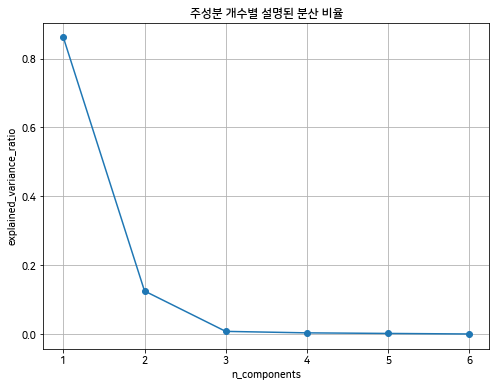

In [23]:
# 예제 데이터를 이용하여 LDA 모델을 학습합니다.
lda = LDA()
lda.fit(train_scaled, train_y)

# 설명된 분산 비율을 가져옵니다.
explained_variance_ratio = lda.explained_variance_ratio_

# 주성분 개수에 따른 설명된 분산 비율을 선 그래프로 나타냅니다.
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio')
plt.title('주성분 개수별 설명된 분산 비율')
plt.grid(True)
plt.show()

In [24]:
# LDA 적용
lda = LDA(n_components=2)
lda.fit(train_scaled, train_y)
lda_transformed_train = lda.transform(train_scaled)
lda_transformed_test = lda.transform(test_scaled)

# LDA로 생성된 데이터프레임 생성
lda_train_df = pd.DataFrame(lda_transformed_train, columns=['LDA1', 'LDA2'])
lda_test_df = pd.DataFrame(lda_transformed_test, columns=['LDA1', 'LDA2'])

# 인덱스 재설정
lda_train_df.reset_index(drop=True, inplace=True)
train_x.reset_index(drop=True, inplace=True)

# 스케일링된 데이터에 LDA 변환 추가
lda_train_x = pd.concat([pd.DataFrame(train_scaled, columns=train_x.columns), lda_train_df], axis=1)
lda_test_x = pd.concat([pd.DataFrame(test_scaled, columns=test_x.columns), lda_test_df], axis=1)

ValueError: Shape of passed values is (96293, 3), indices imply (96293, 2)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
# 데이터 분할
X_train, X_valid, y_train, y_valid = train_test_split(lda_train_x, train_y, test_size=0.2, random_state=42)

In [ ]:
# 랜덤 포레스트 모델 생성
rf_model = RandomForestClassifier(
    n_estimators=300,  # 트리 개수
    max_depth=None,    # 트리의 최대 깊이, None은 제한 없음을 의미합니다.
    min_samples_leaf=1,  # 리프 노드가 가져야 하는 최소 샘플 수
    random_state=42     # 재현성을 위한 랜덤 시드
)
# 모델 학습
rf_model.fit(X_train, y_train)

# 검증 데이터 예측
y_pred_rf = rf_model.predict(X_valid)

# Macro F1 score 계산
f1_macro = f1_score(y_valid, y_pred_rf, average='macro')
print("Validation Macro F1 score for Random Forest Classifier:", f1_macro)

In [ ]:
# 테스트 데이터 예측
y_pred_test = rf_model.predict(lda_test_x)

# 결과 제출 또는 저장
submission_df['대출등급'] = y_pred_test
submission_df.to_csv('sub_0204.csv', index=False)